### [Predict Stock Movements Using Random Forest](https://wire.insiderfinance.io/how-to-predict-stock-movements-using-random-forest-ad313dbe4aa7)

> Predicting Stock Direction using ML alogorithm

#### Stock Price Prediction

Stock price predictions are a key part of trading, and machine learning offers powerful tools to make these predictions more accurate.

Stock price prediction is an essential aspect of algorithmic trading and investment strategies. By predicting whether a stock’s price will go up (**bullish**) or down (**bearish**), traders can make informed decisions.

In [1]:
!pip install -q yfinance matplotlib scikit-learn seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('dark_background')

In [4]:
data = yf.download("TSLA", start="2010-01-01", end="2023-12-31", auto_adjust=True, interval="1wk")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-28,1.280000,2.028000,1.169333,1.266667,739680000
2010-07-05,1.160000,1.333333,0.998667,1.333333,383259000
2010-07-12,1.376000,1.433333,1.126667,1.196667,231583500
2010-07-19,1.419333,1.483333,1.300000,1.424667,107635500
2010-07-26,1.329333,1.433333,1.303333,1.433333,45780000


In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,705.000000,705.000000,705.000000,705.000000,7.050000e+02
mean,70.295107,74.330071,66.177568,70.065700,4.668931e+08
std,101.106962,107.115384,95.374164,101.048622,3.452996e+08
min,1.160000,1.306000,0.998667,1.196667,1.941900e+07
25%,10.811333,11.366667,9.770000,10.580000,2.388765e+08
50%,16.967333,17.652000,16.313999,16.835333,4.187505e+08
75%,110.047333,118.800003,95.400002,110.599998,6.108120e+08
max,407.363342,414.496674,372.886658,387.443329,3.200578e+09


In [6]:
data.columns = data.columns.get_level_values(0)
data = data[['Open', 'Close', 'Volume', 'Low', 'High']]

In [7]:
# Function to plot individual features
def plot_feature(data, feature, color, title, ylabel):
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data[feature], label=feature, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{feature}.png")
    plt.show()

#### Open

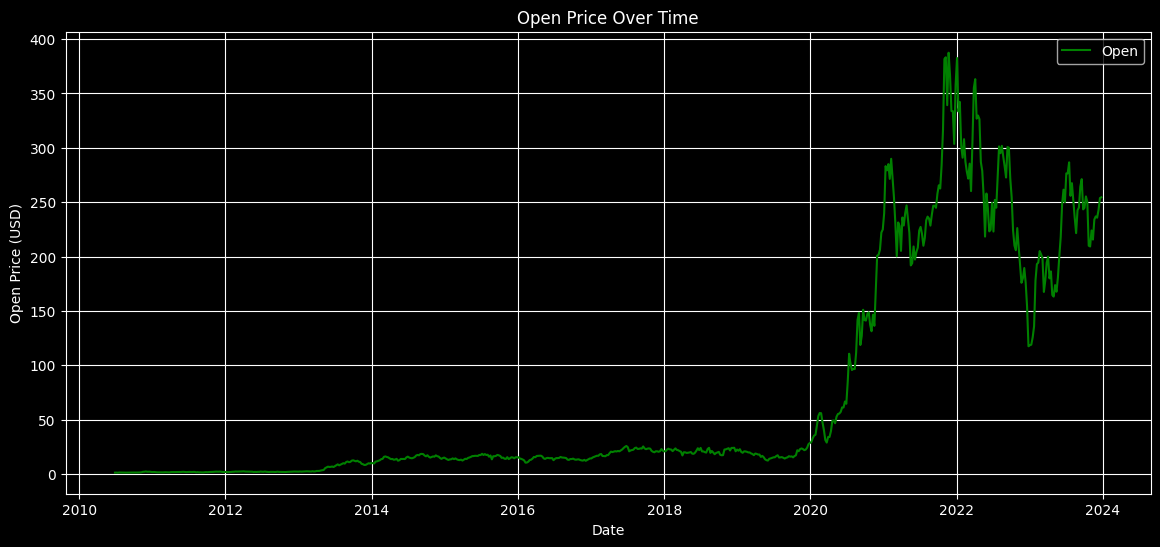

In [8]:
plot_feature(data, 'Open', 'green', 'Open Price Over Time', 'Open Price (USD)')

#### Close

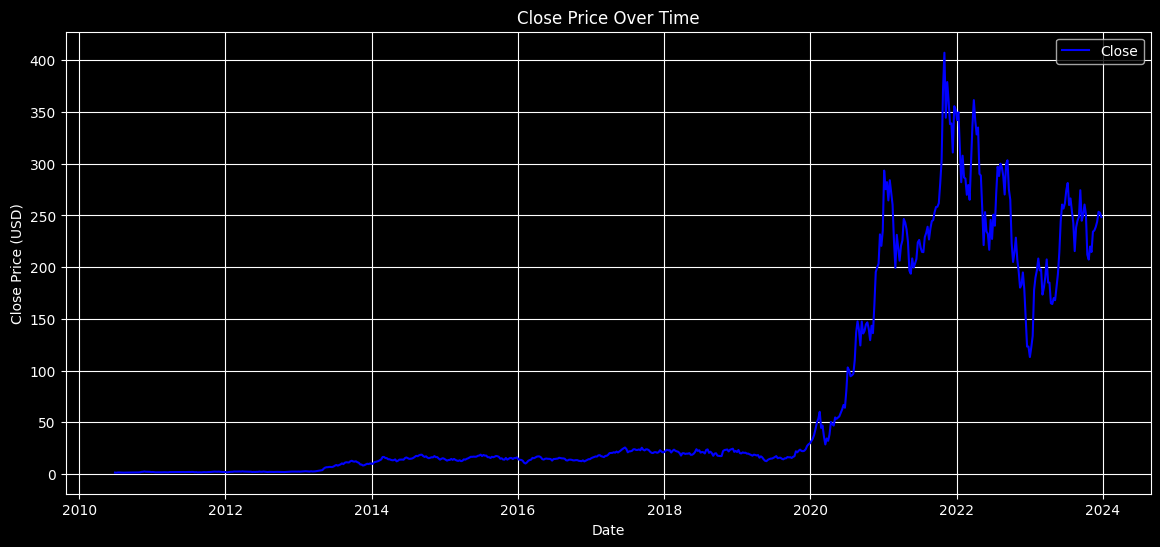

In [9]:
plot_feature(data, 'Close', 'blue', 'Close Price Over Time', 'Close Price (USD)')

#### Volume

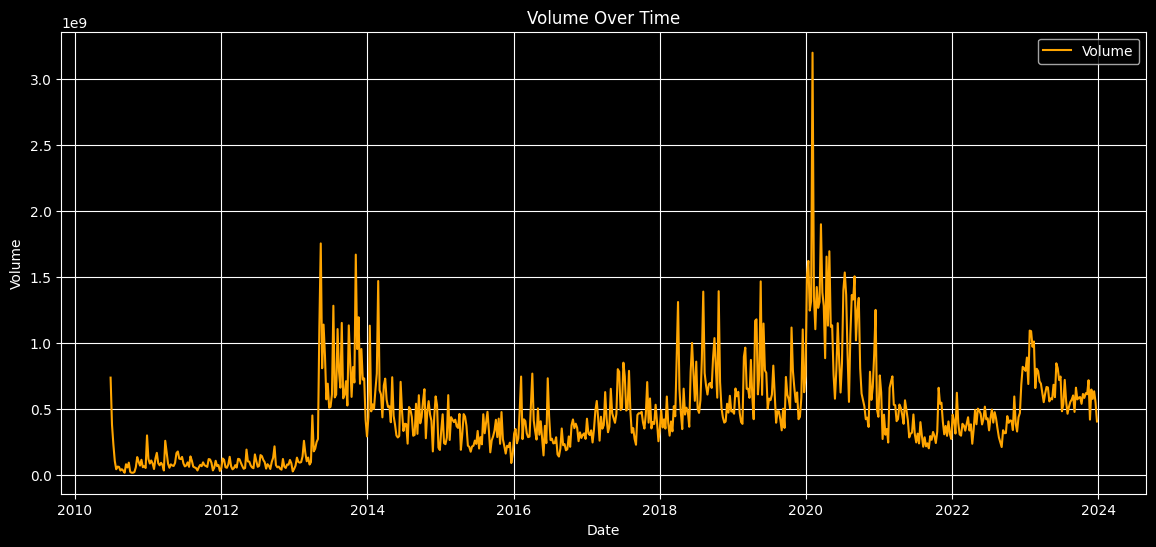

In [10]:
plot_feature(data, 'Volume', 'orange', 'Volume Over Time', 'Volume')

#### Low

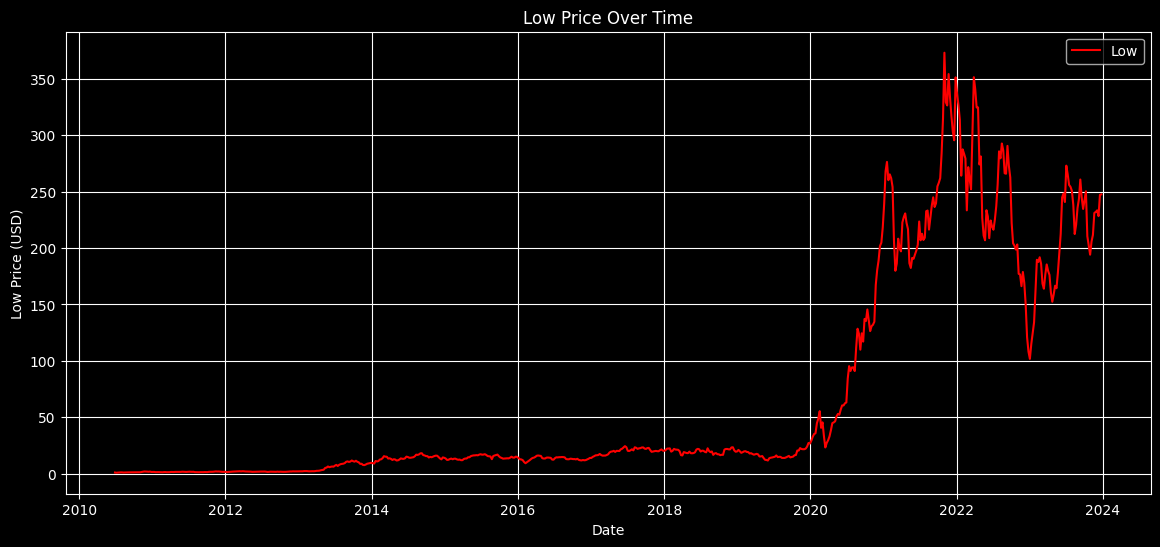

In [11]:
plot_feature(data, 'Low', 'red', 'Low Price Over Time', 'Low Price (USD)')

#### High

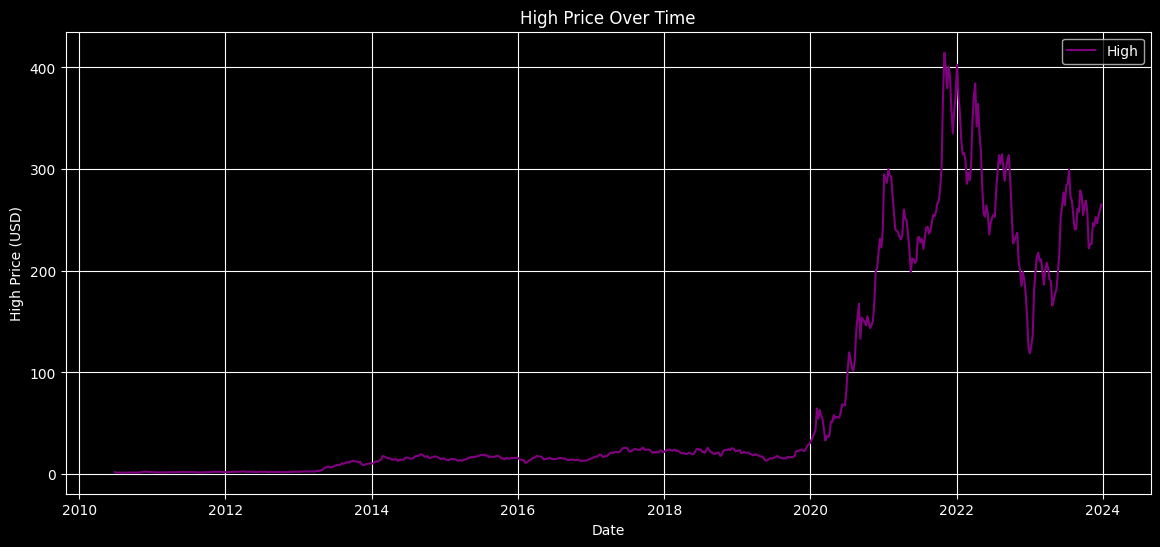

In [12]:
plot_feature(data, 'High', 'purple', 'High Price Over Time', 'High Price (USD)')

#### Feature Engineering: Creating the Target Variable
To predict the stock's direction (up or down), a target variable needs to be defined.

Create a new column, **_Direction_**, which is

- **1** if the next day's closing price is higher than the current day's closing price, and
- **0** if it’s lower. This will allow to classify whether the stock is going up or down.

In [13]:
data["Direction"] = (data["Close"].shift(-1) > data["Close"]).astype(int)
data.dropna(inplace=True)

In [14]:
data.head()

Price,Open,Close,Volume,Low,High,Direction
Date,,,,,,
2010-06-28,1.266667,1.280000,739680000,1.169333,2.028000,0
2010-07-05,1.333333,1.160000,383259000,0.998667,1.333333,1
2010-07-12,1.196667,1.376000,231583500,1.126667,1.433333,1
2010-07-19,1.424667,1.419333,107635500,1.300000,1.483333,0
2010-07-26,1.433333,1.329333,45780000,1.303333,1.433333,0


#### Defining Features and Splitting the Data

In [15]:
X = data[['Open', 'Close', 'Volume', 'Low', 'High']]
y = data["Direction"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#### Training the Random Forest Classifier

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Classification Report

In [18]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54        67
           1       0.57      0.54      0.56        74

    accuracy                           0.55       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.55      0.55      0.55       141



#### Confusion Matrix

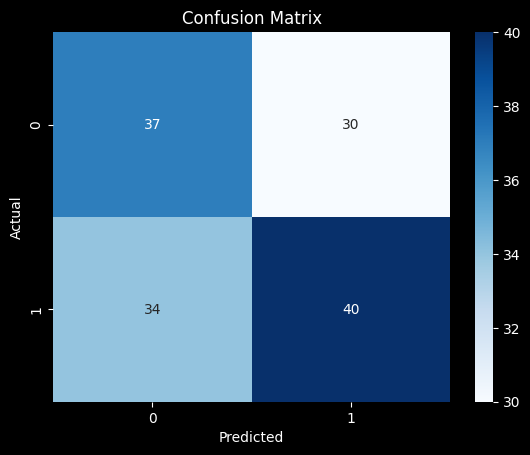

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

#### Visualizing the Predictions

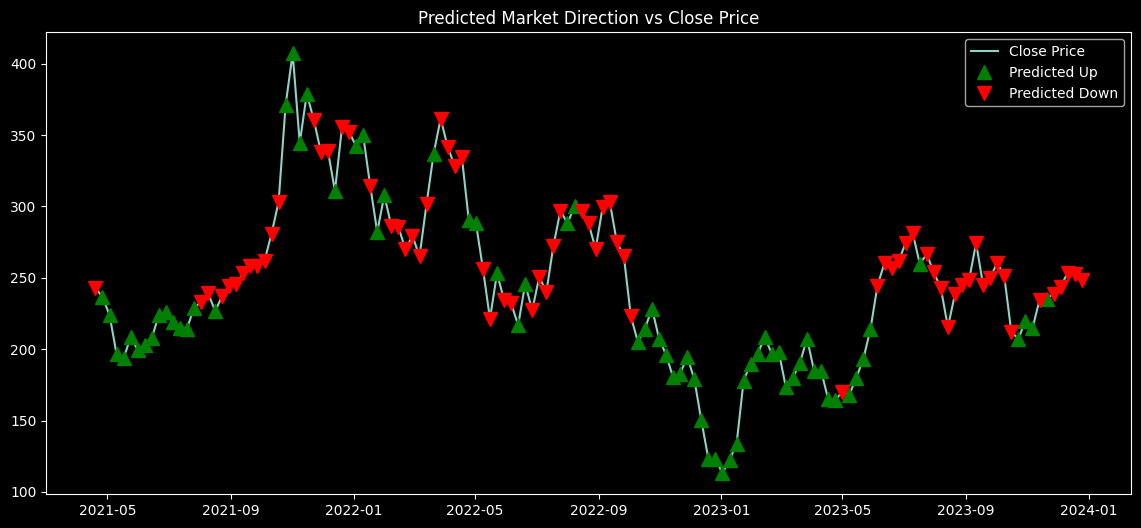

In [20]:
plt.figure(figsize=(14,6))
plt.plot(data.index[-len(y_test):], data["Close"][-len(y_test):], label='Close Price')
plt.plot(data.index[-len(y_test):][y_pred == 1], data["Close"][-len(y_test):][y_pred == 1], '^', markersize=10, color='g', label='Predicted Up')
plt.plot(data.index[-len(y_test):][y_pred == 0], data["Close"][-len(y_test):][y_pred == 0], 'v', markersize=10, color='r', label='Predicted Down')
plt.title("Predicted Market Direction vs Close Price")
plt.legend()
plt.savefig("predicted_market_direction.png")
plt.show()

#### Feature Importance

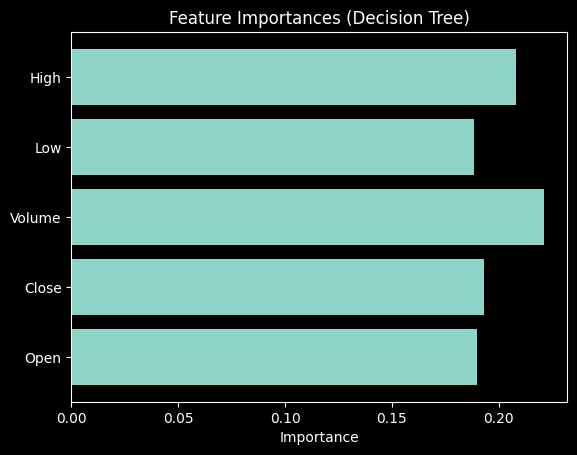

In [21]:
importances = model.feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.savefig("feature_importances.png")
plt.show()